In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5
x_train = x_train.reshape((-1, 784))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
num_classes = 10
latent_dim = 100

In [4]:
# Label embedding
def build_generator():
    noise = layers.Input(shape=(latent_dim,))
    label = layers.Input(shape=(1,), dtype="int32")
    label_embedding = layers.Embedding(num_classes, 50)(label)
    label_embedding = layers.Flatten()(label_embedding)

    model_input = layers.Concatenate()([noise, label_embedding])

    x = layers.Dense(128, activation="relu")(model_input)
    x = layers.Dense(784, activation="tanh")(x)

    return tf.keras.Model([noise, label], x)

In [5]:
def build_discriminator():
    img = layers.Input(shape=(784,))
    label = layers.Input(shape=(1,), dtype="int32")
    label_embedding = layers.Embedding(num_classes, 50)(label)
    label_embedding = layers.Flatten()(label_embedding)

    model_input = layers.Concatenate()([img, label_embedding])

    x = layers.Dense(128, activation="relu")(model_input)
    x = layers.Dense(1, activation="sigmoid")(x)

    return tf.keras.Model([img, label], x)


In [6]:
# Build models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
                      loss="binary_crossentropy")

In [7]:
noise = layers.Input(shape=(latent_dim,))
label = layers.Input(shape=(1,))
img = generator([noise, label])
discriminator.trainable = False
validity = discriminator([img, label])
cgan = tf.keras.Model([noise, label], validity)
cgan.compile(optimizer=tf.keras.optimizers.Adam(0.0002),
             loss="binary_crossentropy")

In [8]:
# Function to show sample images for a specific digit
def show_samples(generator, epoch, digit=7, n=25):
    noise = np.random.normal(0, 1, (n, latent_dim))
    labels = np.full((n, 1), digit)  # All same digit
    gen_imgs = generator.predict([noise, labels])
    gen_imgs = gen_imgs.reshape((n, 28, 28))

    plt.figure(figsize=(5, 5))
    for i in range(n):
        plt.subplot(5, 5, i+1)
        plt.imshow(gen_imgs[i], cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Generated '{digit}' at Epoch {epoch}")
    plt.show()

In [9]:
# Training loop
epochs = 50
batch_size = 128

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/50 | D loss: 1.6226 | G loss: 0.7802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


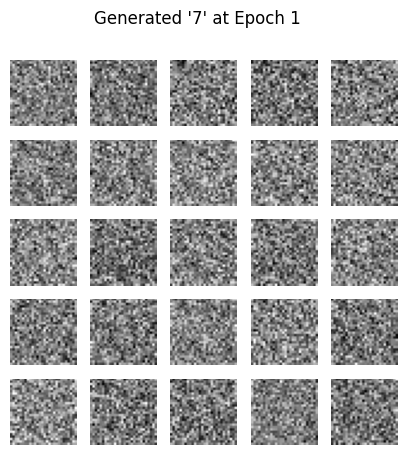

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 10/50 | D loss: 1.5139 | G loss: 0.4642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


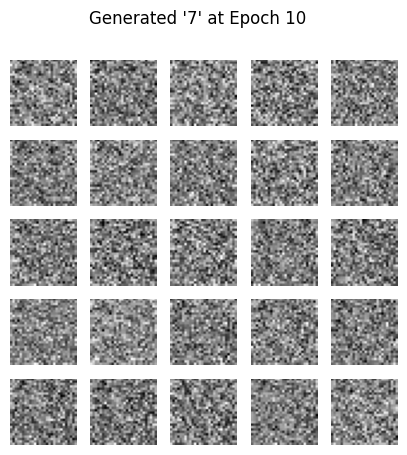

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Epoch 20/50 | D loss: 1.8073 | G loss: 0.2906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


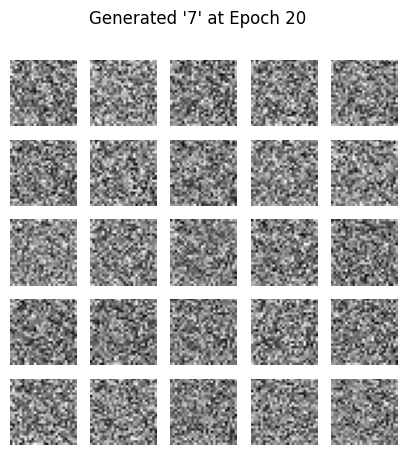

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 30/50 | D loss: 2.0825 | G loss: 0.2071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


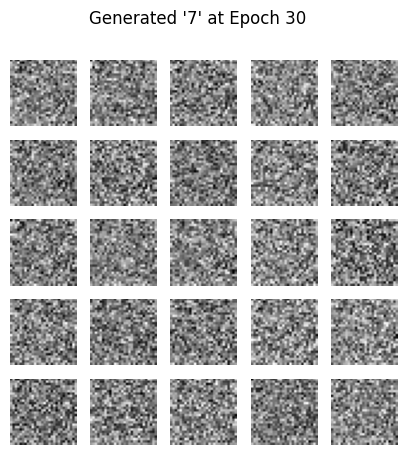

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 40/50 | D loss: 2.3102 | G loss: 0.1605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


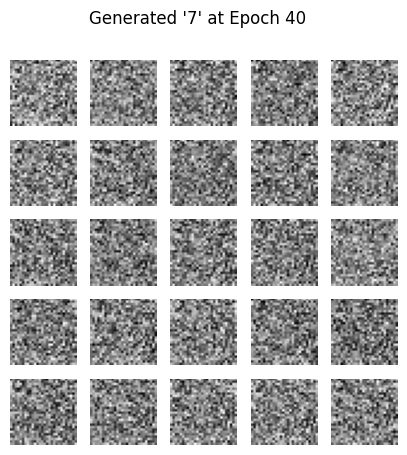

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 50/50 | D loss: 2.4915 | G loss: 0.1311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


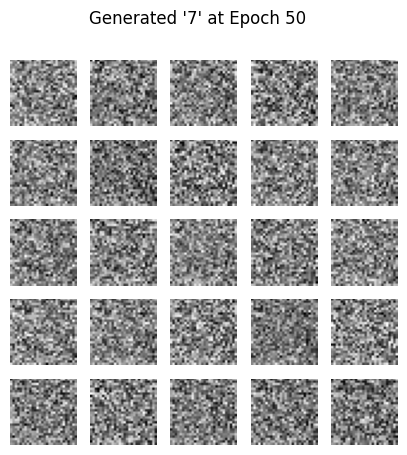

In [10]:
for epoch in range(1, epochs+1):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    labels_real = y_train[idx].reshape(-1, 1)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_labels = np.random.randint(0, num_classes, (batch_size, 1))
    fake_imgs = generator.predict([noise, fake_labels])

    d_loss_real = discriminator.train_on_batch([real_imgs, labels_real], np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch([fake_imgs, fake_labels], np.zeros((batch_size, 1)))

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, (batch_size, 1))
    g_loss = cgan.train_on_batch([noise, sampled_labels], np.ones((batch_size, 1)))

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch}/{epochs} | D loss: {(d_loss_real+d_loss_fake)/2:.4f} | G loss: {g_loss:.4f}")
        show_samples(generator, epoch, digit=7)  # Always show digit '7'